In [13]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pdb
import numpy as np
import numpy.random as npr
import tensorflow as tf
from tensorflow.python.ops import parallel_for as pfor
import sys
import json
import re
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
from numpy import linalg as LA
from sklearn import linear_model
from sklearn.manifold import MDS
from sklearn.neighbors import DistanceMetric
from scipy.spatial import distance
from sklearn.cluster import KMeans

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'stepnet'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_YANGNET)
import tools
from tools_lnd import remove_spines

In [14]:
figpath = os.path.join(p,'code','overleaf','multitask-nets','v4_figs','paper_figs','fig1','interp_schematic')
if not os.path.exists(figpath):
    os.makedirs(figpath)

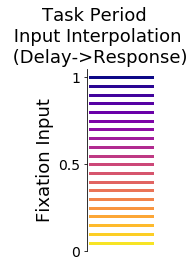

In [60]:
cmap_grad = plt.get_cmap('plasma')
n_steps = 20
fig_size = 3
lw = 3

fig = plt.figure(figsize=(fig_size/1.5,fig_size),tight_layout=True,facecolor='white')
ax = plt.subplot(111)
for step_i in range(n_steps):
    step_frac = step_i/n_steps
    c = cmap_grad(step_frac)
    plt.plot([0,1],[1-step_frac,1-step_frac],c = c, linewidth = lw)
    
# plt.title('Task Period \n Input Interpolation \n (Delay->Response)',fontsize = 18)
plt.ylabel('Fixation Input',fontsize = 18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([0,.5,1])
ax.set_yticklabels([0,.5,1],fontsize = 14)

plt.suptitle('Task Period \n Input Interpolation \n (Delay->Response)',fontsize = 18, y=1.22)

figname = 'Delay_Response.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')
plt.show()

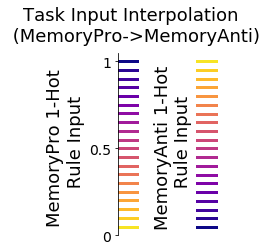

In [59]:
cmap_grad = plt.get_cmap('plasma')
n_steps = 20
fig_size = 3

fig = plt.figure(figsize=(fig_size/1.1,fig_size),tight_layout=True,facecolor='white')
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
for step_i in range(n_steps):
    step_frac = step_i/n_steps
    c = cmap_grad(step_frac)
    ax1.plot([0,1],[1-step_frac,1-step_frac],c = c, linewidth = lw)
    ax2.plot([0,1],[step_frac,step_frac],c = c, linewidth = lw)

ax1.set_ylabel('MemoryPro 1-Hot \n Rule Input',fontsize = 18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([0,.5,1])
ax1.set_yticklabels([0,.5,1],fontsize = 14)


ax2.set_ylabel('MemoryAnti 1-Hot \n Rule Input',fontsize = 18)
remove_spines(ax2)
ax2.set_xticks([])
ax2.set_yticks([])

plt.suptitle('Task Input Interpolation \n (MemoryPro->MemoryAnti)',fontsize = 18, y=1.15)

figname = 'MemoryPro_MemoryAnti.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')
plt.show()